# Walking the Pandas walk


## Preliminaries

Before you begin, execute the following cell to load the provided tests. Each
time you start your notebook, you will need to execute this cell again to load
the tests.

In [35]:
# Don't change this cell; just run it.

import numpy as np
import pandas as pd
# Safe settings for Pandas.
pd.set_option('mode.chained_assignment', 'raise')

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

from client.api.notebook import Notebook
ok = Notebook('pandering.ok')

**Important**: The `ok` tests don't usually tell you that your answer is
correct. More often, they help catch careless mistakes. It's up to you to
ensure that your answer is correct. If you're not sure, ask someone (not for
the answer, but for some guidance about your approach).


## Unemployment

The Federal Reserve Bank of St. Louis publishes data about jobs in the US.
Below we've loaded data on unemployment in the United States.  There are many
ways of defining unemployment, and our dataset includes two notions of the
unemployment rate:

1. Among people who are able to work and are looking for a full-time job, the
   percentage who can't find a job.  This is called the Non-Employment Index,
   or NEI.
2. Among people who are able to work and are looking for a full-time job, the
   percentage who can't find any job *or* are only working at a part-time job.
   The latter group is called "Part-Time for Economic Reasons", so the acronym
   for this index is NEI-PTER.  (Economists are great at marketing.)

The source of the data is [here](https://fred.stlouisfed.org/categories/33509).

**Question 1.** The data are in a CSV file called `unemployment.csv`.  Load
that file into a table called `unemployment`.

In [6]:
unemployment = pd.read_csv("unemployment.csv")

In [7]:
# _ = ok.grade('q1_1')

**Question 2.** Sort the data in *decreasing* order by NEI, naming the sorted
table `by_nei`.  Create another table called `by_nei_pter` that's sorted in
decreasing order by NEI-PTER instead.

In [8]:
by_nei = unemployment.sort_values("NEI", ascending = False)
by_nei_pter = unemployment.sort_values("NEI-PTER", ascending = False)

In [9]:
# _ = ok.grade('q1_2')

**Question 3.** Make a table containing the data for the 10 quarters when NEI was greatest.  Call that table `greatest_nei`.

In [10]:
greatest_nei = by_nei.head(10)
greatest_nei

,Date,NEI,NEI-PTER
63,2009-10-01,10.9698,12.8557
64,2010-01-01,10.9054,12.7311
62,2009-07-01,10.8089,12.7404
61,2009-04-01,10.7082,12.5497
65,2010-04-01,10.6597,12.5664
67,2010-10-01,10.5856,12.4329
66,2010-07-01,10.5521,12.3897
68,2011-01-01,10.5024,12.3017
70,2011-07-01,10.4856,12.2507
69,2011-04-01,10.4409,12.2470


In [11]:
# _ = ok.grade('q1_3')

**Question 4.** It's believed that many people became PTER (recall: "Part-Time
for Economic Reasons") in the "Great Recession" of 2008-2009.  NEI-PTER is the
percentage of people who are unemployed (and counted in the NEI) plus the
percentage of people who are PTER.  Compute a Series containing the percentage
of people who were PTER in each quarter.  (The first element of the Series
should correspond to the first row of `unemployment`, and so on.)

*Note:* Use the original `unemployment` table for this.

In [12]:
pter = pd.DataFrame()
pter = unemployment["NEI-PTER"] - unemployment["NEI"]
# Show the first five values.
pter.head()

0    1.0746
1    1.1644
2    1.1555
3    1.1290
4    1.2139
dtype: float64

In [13]:
# _ = ok.grade('q1_4')

**Question 5.** Add `pter` as a column named "PTER" to `unemployment` and sort
the resulting table by that column in decreasing order.  Call the table
`by_pter`.

In [14]:
unemployment["PTER"] = pter
by_pter = unemployment.sort_values("PTER", ascending = False)
# Show the first five values.
by_pter.head()

,Date,NEI,NEI-PTER,PTER
62,2009-07-01,10.8089,12.7404,1.9315
65,2010-04-01,10.6597,12.5664,1.9067
63,2009-10-01,10.9698,12.8557,1.8859
67,2010-10-01,10.5856,12.4329,1.8473
61,2009-04-01,10.7082,12.5497,1.8415


In [15]:
# _ = ok.grade('q1_5')

**Question 6.** Does it seem true that the PTER rate was very high during the
Great Recession, compared to other periods in the dataset?  Explore the values
in the table, and consider doing some plots.  Justify your answer by referring
to specific values in the table or by generating a chart.
Answer. There is an increase in the PTER rate according to the plot below


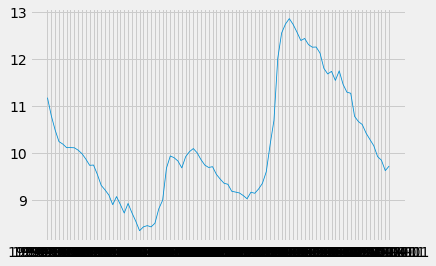

In [21]:
cols = unemployment.columns
figure, ax1 = plt.subplots()
ax1.plot(unemployment[cols[0]],unemployment[cols[2]],linewidth=0.8,zorder=2, label = "PTER rate")


By computing the mean average of every quarter from 2005 to 2007 and doing the same for 2008 to 2010, the result clearly shows that average PTER has substantially increased between the two periods. In fact, it increased by over 40%. Moreover, the line plot clearly indicates a substantial increase of PTER in the time period of the Great Recession. Thus, based on the data and calculations provided, it does seem true that PTER was very high during the Great Recession, and according to the plot the highest PTER value across all data points was recorded in 2009, which was during the Great Recession.

## 2. Birth Rates

The following table gives census-based population estimates for each state in
the USA, on July 1, 2015 and July 1, 2016. The last four columns describe the
components of the estimated change in population during this time interval.
*For all questions below, assume that the word "states" refers to all 52 rows
including Puerto Rico & the District of Columbia.*

In [25]:
# Don't change this cell; just run it.
# From http://www2.census.gov/programs-surveys/popest/datasets/2010-2016/national/totals/nst-est2016-alldata.csv
# See https://www2.census.gov/programs-surveys/popest/datasets/2010-2016/national/totals/nst-est2016-alldata.pdf
#     for column descriptions.
# Read the table
raw_pop = pd.read_csv('nst-est2016-alldata.csv')
# Select rows giving summaries at US state level (summary level).
pop = raw_pop[raw_pop['SUMLEV'] == 40]
# Select only the columns we're interested in
good_cols = ['REGION', 'NAME', 'POPESTIMATE2015', 'POPESTIMATE2016',
             'BIRTHS2016', 'DEATHS2016', 'NETMIG2016', 'RESIDUAL2016']
pop = pop.loc[:, good_cols]
# Give the columns new names
good_names = ['REGION', 'NAME', '2015', '2016',
             'BIRTHS', 'DEATHS', 'MIGRATION', 'OTHER']
pop.columns = good_names
# Show the first five rows.
pop.head()

,REGION,NAME,2015,2016,BIRTHS,DEATHS,MIGRATION,OTHER
5,3,Alabama,4853875,4863300,58556,52405,3874,-600
6,4,Alaska,737709,741894,11255,4511,-2557,-2
7,4,Arizona,6817565,6931071,87204,56564,76405,6461
8,3,Arkansas,2977853,2988248,37936,30581,3530,-490
9,4,California,38993940,39250017,502848,273850,33530,-6451


**Question 1.** Assign `us_birth_rate` to the total US annual birth rate during
this time interval. The annual birth rate for a year-long period is the number
of births in that period as a proportion of the population at the start of the
period.

In [26]:
us_population = sum(pop["2015"])
births = sum(pop["BIRTHS"])
us_birth_rate = births/us_population
us_birth_rate

0.012358536498646102

In [27]:
_ = ok.grade('q2_1')

NameError: name 'ok' is not defined

**Question 2.** Assign `fastest_growth` to a Series of the names of the five
US states with the fastest overall population growth rates in *descending order
of growth rate*.

*Hint 1* - you may well find yourself adding another column to the `pop` data
frame.

*Hint 2* - remember this is a growth *rate*.  See above.

In [29]:
pop_growth = np.array([]) 
for i in np.arange(1,53):
    diff = (pop["2016"].iloc[i-1] - pop["2015"].iloc[i-1])/pop["2016"].iloc[i-1]
    pop_growth = np.append(pop_growth,diff)
pop["GROWTH RATE"] = pop_growth
growth = pop.sort_values("GROWTH RATE", ascending = False) 
fastest_growth = pd.Series()
fastest_growth = growth["NAME"].head(5)
fastest_growth


C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_19880\2065498042.py:7: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  fastest_growth = pd.Series()


49          Utah
33        Nevada
17         Idaho
14       Florida
52    Washington
Name: NAME, dtype: object

In [ ]:
_ = ok.grade('q2_2')

**Question 3.** Assign `n_movers` to the *number* of states for which the
absolute annual *rate* of migration was higher than 1%. The annual rate of
migration for a year-long period is the net number of migrations (in and out)
as a proportion of the population at the start of the period. The `MIGRATION`
column contains estimated annual net migration counts by state.

In [30]:
annual_rate_migration=[]
counter=0
for i in np.arange(1,53):
  annual_rate_migrations = (pop["MIGRATION"].iloc[i-1] / pop["2015"].iloc[i-1])*100
  annual_rate_migration.append(annual_rate_migrations)
for i in range(len(annual_rate_migration)):
  if annual_rate_migration[i] > 1:
    counter +=1
n_movers = counter
n_movers

8

In [ ]:
_ = ok.grade('q2_3')

**Question 4.** Assign `n_west_births` to the total *number* of births that
occurred in region 4 (the Western US).

*Hint* - be careful - what type of values does the `REGION` column contain?
Look at the `REGION` value for Puerto Rico.

In [ ]:
region_n4 = pop["REGION"] == "4"
west_births = pop["BIRTHS"][region_n4]
n_west_births = sum(west_births)
n_west_births

979657

In [ ]:
_ = ok.grade('q2_4')

**Question 5.** Assign `n_less_than_west_births` to the number of states that
had a total population in 2016 that was smaller than the *number of babies born
in region 4 (the Western US)* during this time interval.

In [ ]:
lower_west_births = pop["2016"] < n_west_births 
n_less_than_west_births = np.count_nonzero(lower_west_births) 
n_less_than_west_births

7

In [5]:
_ = ok.grade('q2_5')

> Opening Firefox...


FileNotFoundError: [Errno 2] No such file or directory: 'images/start_button.png'

**Question 6.** Was there an association between birth rate and death rate
during this time interval? Use the code cell below to support your conclusion
with a chart. If an association exists, what might explain it?


There was a minute positive association between Birth Rate and Death Rate, however the correlation seems to be close to 0 and therefore, I would not expect it to be statistically significant.

<AxesSubplot:xlabel='DEATH RATE', ylabel='BIRTH RATE'>

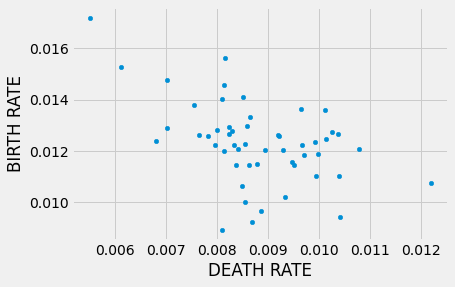

In [ ]:
#- Generate a chart here to support your conclusion
birth_rate = pop["BIRTHS"]/pop["2015"]
death_rate = pop["DEATHS"]/pop["2015"]
association = birth_rate/death_rate

pop["BIRTH RATE"] = birth_rate
pop["DEATH RATE"] = death_rate
pop["BIRTH/DEATH RATE"] = association
pop.plot(x = "DEATH RATE", y = "BIRTH RATE", kind = "scatter")

## 3. Consumer Financial Protection Bureau Complaints

The Consumer Financial Protection Bureau has collected and published consumer
complaints against financial companies since 2011.  The data are available
[here](https://dev.socrata.com/foundry/data.consumerfinance.gov/jhzv-w97w) (or
at this [direct
link](https://data.consumerfinance.gov/resource/jhzv-w97w.csv)).  For this
exercise, to make your code run faster, we've selected only the data from
May 2016.

Run the next cell to load the data.  Each row represents one consumer's complaint.

In [31]:
# Just run this cell.
complaints = pd.read_csv("complaints.csv")
complaints.head()

,company,company_public_response,company_response,complaint_id,complaint_what_happened,consumer_consent_provided,consumer_disputed,date_received,date_sent_to_company,issue,product,state,sub_issue,sub_product,submitted_via,tags,timely,zip_code
0,"TransUnion Intermediate Holdings, Inc.",Company has responded to the consumer and the ...,Closed with explanation,1920073,(None),(None),Yes,2016-05-11T15:39:07.000,2016-05-11T15:39:07.000,Credit reporting company's investigation,Credit reporting,VT,Inadequate help over the phone,(None),Phone,(None),Yes,05035
1,"TransUnion Intermediate Holdings, Inc.",Company has responded to the consumer and the ...,Closed with explanation,1914777,(None),Consent not provided,No,2016-05-08T00:53:47.000,2016-05-12T18:40:34.000,Incorrect information on credit report,Credit reporting,MO,Information is not mine,(None),Web,(None),Yes,63020
2,Bank of America,Company has responded to the consumer and the ...,Closed with explanation,1907306,I became aware of several charges on a Bank of...,Consent provided,No,2016-05-03T16:49:33.000,2016-05-03T16:49:34.000,Other,Credit card,VA,(None),(None),Web,(None),Yes,239XX
3,Finance of America Reverse LLC,Company believes it acted appropriately as aut...,Closed with explanation,1919055,I applied for a reverse mortgage and everthing...,Consent provided,No,2016-05-10T20:13:22.000,2016-05-10T20:13:23.000,"Application, originator, mortgage broker",Mortgage,TX,(None),Reverse mortgage,Web,Older American,Yes,774XX
4,"Acceptance Solutions Group, INC",Company believes it acted appropriately as aut...,Closed with explanation,1908628,Keeps calling numbers that are not mine. And t...,Consent provided,No,2016-05-03T21:05:42.000,2016-05-06T13:42:45.000,Improper contact or sharing of info,Debt collection,OH,Talked to a third party about my debt,Payday loan,Web,(None),Yes,430XX


**Question 1.** Financial companies offer a variety of products.  How many
complaints were made against each kind of product?  Make a Series called
`complaints_per_product` with one element per product category, where the index
label is the name of the product (from the "product" column), and the
corresponding value is the "number of complaints" (the number of complaints
made against that kind of product).

*Hint* - the way to do this is more familiar than it might at first appear.

In [32]:
complaints_per_product = complaints["product"] 
complaints_per_product = complaints_per_product.value_counts() 
complaints_per_product

Credit reporting           3820
Mortgage                   3468
Debt collection            3022
Bank account or service    1687
Credit card                1566
Consumer Loan               775
Student loan                306
Money transfers             142
Payday loan                 119
Prepaid card                110
Other financial service      16
Name: product, dtype: int64

In [ ]:
_ = ok.grade('q3_1')

**Question 2.** Make a horizontal bar chart showing how many complaints were
made about each product category. Sort the bars from longest to shortest.
Because this is a horizontal bar chart, the product axis should be on the left
(y-axis), and the counts axis should be at the bottom (x-axis).

Text(0.5, 0, 'complaints')

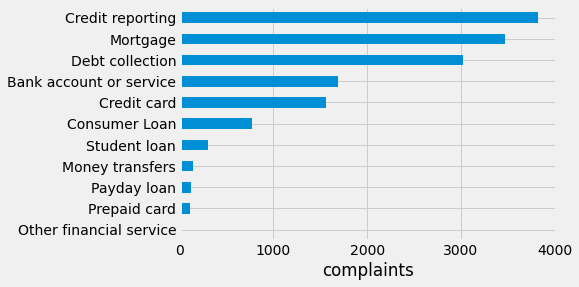

In [33]:
complaints_per_product = complaints_per_product.sort_values(ascending = True)
complaints_per_product.plot(kind = "barh").set_xlabel("complaints")

**Question 3.** Make a Series of the number of complaints made against each
*company*.  Call it `complaints_per_company`.  It should have one row per
company. The index labels will have the "company" name (the name of the
company) and corresponding values with be the number of complaints (the number
of complaints made against that company).

In [ ]:
complaints_per_company = complaints["company"]
complaints_per_company =complaints_per_company.value_counts()
complaints_per_company

Equifax                                     1440
Experian                                    1240
TransUnion Intermediate Holdings, Inc.      1034
Wells Fargo & Company                        771
Bank of America                              769
                                            ... 
Honor Finance Holdings, LLC                    1
Pacific Residential Mortgage, LLC              1
Expert Global Solutions, Inc.                  1
Charles Schwab Bank                            1
Praxis Financial Solutions, Incorporated       1
Name: company, Length: 1141, dtype: int64

In [ ]:
_ = ok.grade('q3_3')

**Question 4.** It wouldn't be a good idea to make a bar chart of that data.  (Don't try it!)  Why not?


There are 1141 different companies which is too many to fit into the graph axis. Therefore, we would not be able to tell which company is which on the y-axis and the graph would be unreadable. 

**Question 5.** Make a horizontal bar chart of just the 10 companies with the
most complaints.  Sort the bars from longest (at the top) to shortest (at the
bottom).

Text(0.5, 0, 'complaints')

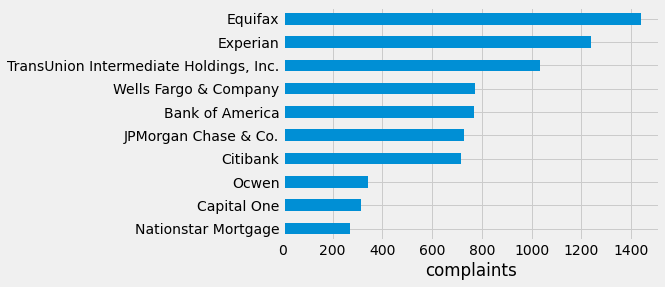

In [ ]:
plot_complaints_per_company = complaints_per_company.head(10).sort_values(ascending = True)
plot_complaints_per_company.plot(kind = "barh").set_xlabel("complaints")

**Question 6.** Make a horizontal bar chart like the one above, with one
difference: The size of each company's bar should be the *proportion* (among
*all complaints* made against any company in `complaints`) that were made
against that company.  Remember the bars should be in order from longest to
shortest.

**Note:** As before, make sure you are not plotting all the companies.  If you do, by accident, consider the Kernel menu Interrupt option.

**Note:** Graphs aren't very useful without accurate labels.  Make sure that the text on the horizontal axis of the graph makes sense.  Investigate how you would put a meaningful label on this axis.

Text(0.5, 0, 'proportion of complaints')

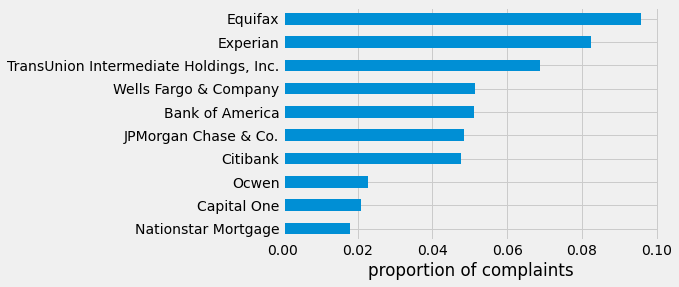

In [ ]:
complaints_per_company_p = (complaints_per_company/sum(complaints_per_company)).head(10).sort_values(ascending = True) 
complaints_per_company_p.plot(kind = "barh").set_xlabel("proportion of complaints")

## Done

You're finished with the assignment!  Be sure to...

- **run all the tests** (the next cell has a shortcut for that),
- **Save and Checkpoint** from the "File" menu.
- Finally, **restart** the kernel for this notebook, and **run all the cells**,
  to check that the notebook still works without errors.  Use the
  "Kernel" menu, and choose "Restart and run all".  If you find any
  problems, go back and fix them, save the notebook, and restart / run
  all again, before submitting.  When you do this, you make sure that
  we, your humble markers, will be able to mark your notebook.

In [ ]:
# For your convenience, you can run this cell to run all the tests at once!
import os
_ = [ok.grade(q[:-3]) for q in os.listdir("tests") if q.startswith('q')]

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=82fe1985-296a-4658-8999-265bc1e2a613' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>